# Insights from Data Analysis



*   Rachel is the dominant character whith highest number of dialouges.
*   Thought diversity score clearly says that ‘Rachel’ was the most complex character.
*   Affinity score map clearly shows that Ross and Rachel had extremely good chemistry and had a good top of mind presence in each other’s conscience
*    Affinity score map shows  the frequency of appearance of a character in each other’s topics in which Ross and Rachel were in first place followed by Monica and Chandler
*  ‘Phoebe’ was the most positive character in the show while ‘Joey’ was the most negative.








# Import Packages

In [3]:
import pandas as pd
import numpy as np
from collections import defaultdict
import re
import json
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


# Import Data after Webscraping

In [4]:
data = pd.read_csv('tbbt_1_10_w_others.csv')
data

,season,episode,episode_name,speaker,dialogue
0,1,1,Pilot Episode,SHELDON,So if a photon is directed through a plane wit...
1,1,1,Pilot Episode,LEONARD,"Agreed, what’s your point?"
2,1,1,Pilot Episode,SHELDON,"There’s no point, I just think it’s a good ide..."
3,1,1,Pilot Episode,LEONARD,Excuse me?
4,1,1,Pilot Episode,LEONARD,"One across is Aegean, eight down is Nabakov, t..."
...,...,...,...,...,...
46636,10,24,The Long Distance Dissonance,SHELDON,"Uh, breakfast yes, lunch no. I did have a coug..."
46637,10,24,The Long Distance Dissonance,SHELDON,How thoughtful. Thank you.
46638,10,24,The Long Distance Dissonance,SHELDON,"And I with you. Question, are you seeking a ro..."
46639,10,24,The Long Distance Dissonance,SHELDON,"Well, that would raise a number of problems. W..."


# Data Inspection

In [5]:
pd.set_option('display.max_colwidth', None)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46641 entries, 0 to 46640
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   season        46641 non-null  int64 
 1   episode       46641 non-null  int64 
 2   episode_name  46641 non-null  object
 3   speaker       46641 non-null  object
 4   dialogue      46641 non-null  object
dtypes: int64(2), object(3)
memory usage: 1.8+ MB


In [6]:
data.head()

,season,episode,episode_name,speaker,dialogue
0,1,1,Pilot Episode,SHELDON,"So if a photon is directed through a plane with two slits in it and either slit is observed it will not go through both slits. If it’s unobserved it will, however, if it’s observed after it’s left the plane but before it hits its target, it will not have gone through both slits."
1,1,1,Pilot Episode,LEONARD,"Agreed, what’s your point?"
2,1,1,Pilot Episode,SHELDON,"There’s no point, I just think it’s a good idea for a tee-shirt."
3,1,1,Pilot Episode,LEONARD,Excuse me?
4,1,1,Pilot Episode,LEONARD,"One across is Aegean, eight down is Nabakov, twenty-six across is MCM, fourteen down is… move your finger… phylum, which makes fourteen across Port-au-Prince. See, Papa Doc’s capital idea, that’s Port-au-Prince. Haiti."


> It seems that character names are sometimes written in captial cases. and sometimes in lower case.

In [7]:
# Lets make the character names consistent and add a new column 'Season'
data.columns

Index(['season', 'episode', 'episode_name', 'speaker', 'dialogue'], dtype='object')

Text(0.5, 1.0, 'Total Number of Lines for Top 15 Characters in the Show ')

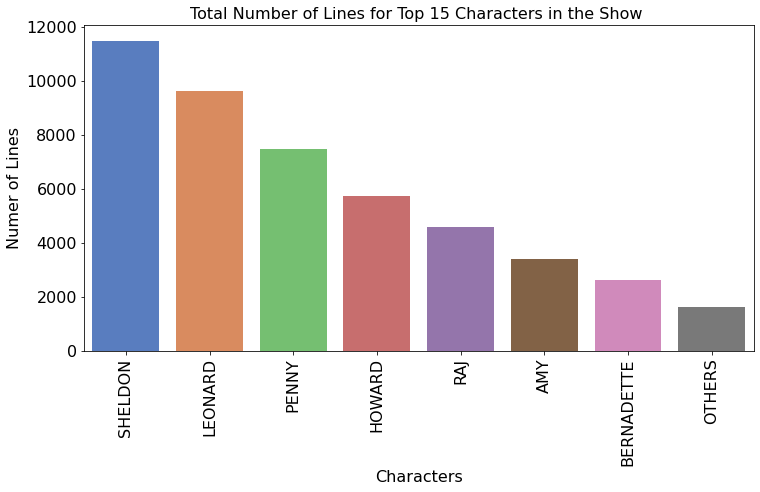

In [8]:
Characters_per_rank = (data.speaker.value_counts()).index 
data_for_count_plot = data[data.speaker.isin (Characters_per_rank[0:15])]
plt.figure(figsize = (12, 6))
sns.countplot(x= 'speaker', order = Characters_per_rank[0:15], palette = 'muted', data = data_for_count_plot)
plt.xlabel("Characters", fontsize=16)
plt.ylabel("Numer of Lines", fontsize=16)
plt.xticks(rotation = 90,  fontsize=16)
plt.yticks(  fontsize= 16)
plt.title("Total Number of Lines for Top 15 Characters in the Show ",fontsize=16)

In [9]:
data_lines_per_season = pd.pivot_table(data_for_count_plot,index=["speaker","season"],values=["dialogue"],aggfunc='count')
data_lines_per_season = data_lines_per_season.reset_index()
data_lines_per_season_pivot = data_lines_per_season.pivot(index='season', columns='speaker', values='dialogue')

In [10]:
data_lines_per_season_pivot.head()

speaker,AMY,BERNADETTE,HOWARD,LEONARD,OTHERS,PENNY,RAJ,SHELDON
season,,,,,,,,
1,NaN,NaN,395.0,1173.0,51.0,665.0,245.0,1100.0
2,NaN,NaN,598.0,1267.0,98.0,941.0,340.0,1344.0
3,5.0,97.0,632.0,1120.0,103.0,849.0,544.0,1307.0
4,353.0,261.0,607.0,1084.0,321.0,742.0,484.0,1328.0
5,416.0,313.0,564.0,908.0,60.0,671.0,360.0,1020.0


<Figure size 864x432 with 0 Axes>

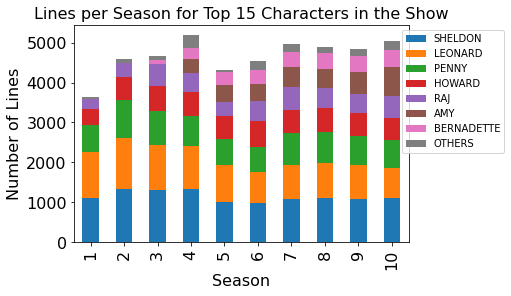

In [11]:
data_lines_per_season_pivot = data_lines_per_season.pivot(index='season', columns='speaker', values='dialogue')
data_lines_per_season_pivot.fillna(0)

#sns.set()
plt.figure(figsize=(12,6))
data_lines_per_season_pivot.loc[:,Characters_per_rank[:14]].plot.bar(stacked=True)

plt.xlabel( "Season",fontsize=16)
plt.ylabel("Number of Lines", fontsize=16)
plt.xticks(  fontsize= 16,rotation = 90)
plt.yticks(  fontsize= 16)
plt.title("Lines per Season for Top 15 Characters in the Show",fontsize=16)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1),prop={'size':10})

# Data Cleaning

In [12]:
# Define a function to return the wordnet object value corresponding to the POS tag

import nltk
from nltk.corpus import wordnet
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

def get_wordnet_pos(pos_tag):

    if pos_tag.startswith('J'):
        
        return wordnet.ADJ

    elif pos_tag.startswith('V'):

        return wordnet.VERB

    elif pos_tag.startswith('N'):

        return wordnet.NOUN

    elif pos_tag.startswith('R'):

        return wordnet.ADV

    else:

        return wordnet.NOUN

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [13]:
# write a function to clean text    
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('omw-1.4')

def clean_text(text):
    #print(text)
    # lower text
    text = text.lower()

    # tokenize text for space and \n
    text = re.split('\s+|\n',text)
    
    # remove puncutation
    text = [word.strip(string.punctuation) for word in text]

    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]

    # remove stop words
    stop = set(stopwords.words('english'))
    text = [x for x in text if x not in stop]

    # remove empty tokens
    text = [t for t in text if len(t) > 0]

    # pos tag text
    pos_tags = pos_tag(text)

    # create a (word, pos_tag) tuple for each word in text and then lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]

    # remove words with only one letter
    text = [t for t in text if len(t) > 1]

    # join all
    text = " ".join(text)

    return(text)

# call the function to clean text data
data["dialogue"] = data["dialogue"].apply(lambda x: clean_text(x))
data["dialogue"].head()

# Eliminate any row with no entry fordata['Lines'] after cleaning 
data['dialogue'].replace('', np.NaN, inplace=True)
data.dropna(inplace=True)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
data.head()

,season,episode,episode_name,speaker,dialogue
0,1,1,Pilot Episode,SHELDON,photon direct plane two slit either slit observe go slits it’s unobserved however it’s observe it’s leave plane hit target go slit
1,1,1,Pilot Episode,LEONARD,agree what’s point
2,1,1,Pilot Episode,SHELDON,there’s point think it’s good idea tee-shirt
3,1,1,Pilot Episode,LEONARD,excuse
4,1,1,Pilot Episode,LEONARD,one across aegean eight nabakov twenty-six across mcm fourteen is… move finger… phylum make fourteen across port-au-prince see papa doc’s capital idea that’s port-au-prince haiti


In [ ]:
# keep a list of all words and a set for all characters for future use in the code
import itertools
line_tokenized = [ re.split(' ',text) for text in data['dialogue'].dropna()]
all_words = list(itertools.chain.from_iterable(line_tokenized))
all_characters = set(data.speaker)

# Interactive EDA: Visualize Word/Letter Density for Different Actors

In [ ]:
# create figure
import ipywidgets as widgets
from ipywidgets import interact

def word_letter_density_distribution(Character_Name):
    f, ax1 = plt.subplots(figsize=(12,5))

    if Character_Name in all_characters:
        letter_count  = data["dialogue"][data.speaker == Character_Name].str.len()
        word_count    =  data["dialogue"][data.speaker == Character_Name].str.split(' ').str.len()
    else:
        letter_count  = data["dialogue"].str.len()
        word_count    =  data["dialogue"].str.split(' ').str.len()
    plt1 = sns.distplot(letter_count[letter_count<1000], ax=ax1, label='letters')
    plt2 = sns.distplot(word_count[word_count<1000], ax=ax1, color='orange', label='words')

    # add legend, title, and labels
    legend = plt.legend( prop={'size': 16})
    title = plt.title('Density of word and letter counts in lines of the transcripts')
    labels = ax1.set(xlabel='Number of Letters or Words', ylabel='Density')

    ax1.set_xlim(0, 200)
    ax1.set_ylim(0, 0.25)

    for item in ([ax1.title, ax1.xaxis.label, ax1.yaxis.label] +
             ax1.get_xticklabels() + ax1.get_yticklabels()):
        item.set_fontsize(16)
      
# features to visualize
Selection_Options = list(Characters_per_rank[:20])
style = {'description_width': 'initial'}
warnings.filterwarnings('ignore')
interact(word_letter_density_distribution, Character_Name = Selection_Options,style = style)


interactive(children=(Dropdown(description='Character_Name', options=('SHELDON', 'LEONARD', 'PENNY', 'HOWARD',…

<function __main__.word_letter_density_distribution(Character_Name)>

# Cumulative Distribution of Word Density for Lines in the Transcript

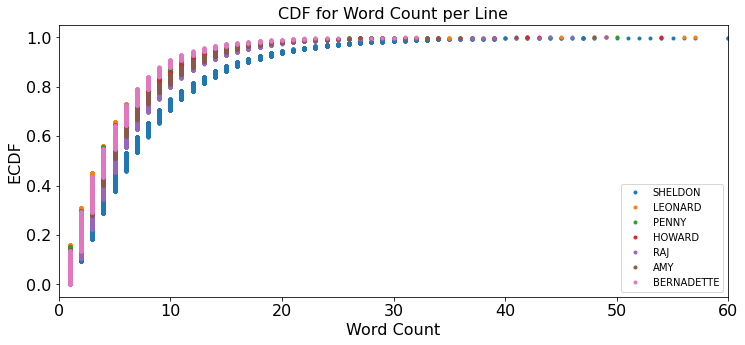

In [ ]:
def ECDF(Character_Name1):
    if Character_Name1 in all_characters:
        word_count1    =  data["dialogue"][data.speaker == Character_Name1].str.split(' ').str.len() 
    else: 
        word_count1    =  data["dialogue"].str.split(' ').str.len()
    
           
    x1 = np.sort(word_count1)
    n1 = len(word_count1)
    y1 = np.arange(1, n1+1) / n1
    return x1,y1
    

x1,y1 = ECDF('SHELDON')
x2,y2 = ECDF('LEONARD')
x3,y3 = ECDF ('PENNY')
x4,y4 = ECDF ('HOWARD')
x5,y5 = ECDF('RAJ')
x6,y6 = ECDF('AMY')
x7,y7 = ECDF('BERNADETTE')

plt.figure(figsize = (12,5))

plt.plot(x1 , y1,marker = '.' , linestyle = 'none', label = 'SHELDON')
plt.plot(x2 , y2 ,marker = '.' , linestyle = 'none', label = 'LEONARD')
plt.plot(x3 , y3 ,marker = '.' , linestyle = 'none', label = 'PENNY')
plt.plot(x4 , y4,marker = '.' , linestyle = 'none', label = 'HOWARD')
plt.plot(x5 , y5 ,marker = '.' , linestyle = 'none', label = 'RAJ')
plt.plot(x6 , y6 ,marker = '.' , linestyle = 'none', label = 'AMY')
plt.plot(x7 , y7 ,marker = '.' , linestyle = 'none', label = 'BERNADETTE')

# Label the axes
plt.xlabel('Word Count', fontsize= 16)
plt.ylabel('ECDF',fontsize= 16)
plt.xticks(  fontsize= 16)
plt.yticks(  fontsize= 16)
plt.title("CDF for Word Count per Line",fontsize=16)
#plt.legend(loc='lower right', bbox_to_anchor=(1.3, 1),prop={'size':10})
plt.legend(loc='lower right')
plt.xlim([0,60])
plt.show()


# Interactive EDA: WordCloud for Leading Actors

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
#from resizeimage import resizeimage
from collections import Counter

#define a function to plot word cloud

def show_wordcloud(data,Filter_Common_Words, Desired_Character = 'All Friends'):
    
    
    #define the image mask for word_cloud plot
  
    image = Image.open('Figures/{0}.png'.format( Desired_Character))
        
    mask = np.array(image)
    def transform_format(val):
        if val == 0:
            return 255
        else:
            return val
    
    transformed_mask = np.ndarray((mask.shape[0],mask.shape[1]), np.int32)

    for i in range(len(mask)):
        transformed_mask[i] = list(map(transform_format, mask[i]))
    
    # Select a list of most common words to filter from the word cloud
    
    if Filter_Common_Words>0:
        
        #sort all word per their frequency and make a list to filter
        list1=all_words
        counts = Counter(list1)
        most_common = sorted(counts, key=counts.get, reverse=True)[0:Filter_Common_Words]
        
        #make sure that names of the characters are not in the filter
        most_common = [word  for word in most_common if not word.upper() in all_characters]
        most_common.append('NaN')

        wordcloud = WordCloud (stopwords=most_common,
                                width=800, height=400,
                                background_color = 'white',
                                scale =3,
                                max_words = 200, 
                                mask = transformed_mask,
                                random_state = 42, 
                                contour_width=3, contour_color='steelblue'
                             ).generate(str(data))
    else:
         wordcloud = WordCloud (width=800, height=400,
                                background_color = 'white',
                                scale =3,
                                max_words = 250, 
                                mask = transformed_mask,
                                random_state = 42, 
                                contour_width=3, contour_color='steelblue',
                                collocations = False,
                             ).generate(str(data))
        
    # plot wordcloud
    fig = plt.figure(1, figsize = (10, 10))
    plt.title('WordCloud: {0}'.format(Desired_Character), fontsize = 32, loc= 'center')
    plt.axis('off')
    
    fig.subplots_adjust(top = 2.3)
    
    plt.tight_layout()
    # show plot
    plt.imshow(wordcloud,interpolation='bilinear')

# Make a list of most common words

In [ ]:
import ipywidgets as widgets

from ipywidgets import interact

def wordcloud_generator(Desired_Character, Filter_Common_Words):
    if Desired_Character in all_characters:
        show_wordcloud(data["Lines"][data.Characters == Desired_Character], Filter_Common_Words, Desired_Character)
    else:
         show_wordcloud(data["Lines"], Filter_Common_Words)
     
# features to visualize


style = {'description_width': 'initial'}
slider_range = widgets.IntSlider(value=1000, min=0, max=15149,style=style)
slider_range.style.handle_color = 'lightblue'

origin = widgets.Dropdown(
    options=list( ['ROSS','MONICA','RACHEL','PHOEBE','JOEY','CHANDLER', 'All Friends']),
    description='Desired_Character',style = style)
    
interact(wordcloud_generator, Desired_Character = origin, Filter_Common_Words = slider_range,style = style)


interactive(children=(Dropdown(description='Desired_Character', options=('ROSS', 'MONICA', 'RACHEL', 'PHOEBE',…

<function __main__.wordcloud_generator(Desired_Character, Filter_Common_Words)>

# Export DataFrame for Further Analysis

In [14]:
#There are 305 chacracters, lets limit the analysis for top 15 to simplify the project
# import data
data.to_csv('bbt_data_clean.csv', encoding = 'utf-8')


In [ ]:
threshold = 15
data = data[data.Characters.isin(Characters_per_rank[0:threshold])]
tokenized_data = data["Lines"].apply(lambda text: re.split(' ',text))
my_tags = Characters_per_rank[0:threshold]
# Label Character
from sklearn import preprocessing
label = preprocessing.LabelEncoder()
target = label.fit_transform(data['Characters'].astype(str))

# Latenet Semantic and Sentiment Analysis

In [ ]:
#'Episodes', 'Episode_Names', 'Characters', 'Lines', 'Season'

is_char = data.speaker.isin(['SHELDON','LEONARD','PENNY','HOWARD','RAJ','AMY','BERNADETTE'])
friends_char_df = data[is_char]
friends_char_df

,season,episode,episode_name,speaker,dialogue
0,1,1,Pilot Episode,SHELDON,photon direct plane two slit either slit observe go slits it’s unobserved however it’s observe it’s leave plane hit target go slit
1,1,1,Pilot Episode,LEONARD,agree what’s point
2,1,1,Pilot Episode,SHELDON,there’s point think it’s good idea tee-shirt
3,1,1,Pilot Episode,LEONARD,excuse
4,1,1,Pilot Episode,LEONARD,one across aegean eight nabakov twenty-six across mcm fourteen is… move finger… phylum make fourteen across port-au-prince see papa doc’s capital idea that’s port-au-prince haiti
...,...,...,...,...,...
45012,10,24,The Long Distance Dissonance,SHELDON,uh breakfast yes lunch cough drop really rid line suck eat
45013,10,24,The Long Distance Dissonance,SHELDON,thoughtful thank
45014,10,24,The Long Distance Dissonance,SHELDON,question seek romantic relationship
45015,10,24,The Long Distance Dissonance,SHELDON,well would raise number problem we’re colleague i’m currently relation… excuse moment


In [ ]:
sheldon_text = list(friends_char_df[friends_char_df.speaker == 'SHELDON'].dialogue)
leonard_text = list(friends_char_df[friends_char_df.speaker == 'LEONARD'].dialogue)
penny_text = list(friends_char_df[friends_char_df.speaker == 'PENNY'].dialogue)
howard_text = list(friends_char_df[friends_char_df.speaker == 'HOWARD'].dialogue)
raj_text = list(friends_char_df[friends_char_df.speaker == 'RAJ'].dialogue)
amy_text = list(friends_char_df[friends_char_df.speaker == 'AMY'].dialogue)
bernadette_text = list(friends_char_df[friends_char_df.speaker == 'BERNADETTE'].dialogue)

In [ ]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

def preprocess_data(doc_set):
    """
    Input  : docuemnt list
    Purpose: preprocess text (tokenize, removing stopwords, and stemming)
    Output : preprocessed text
    """
    # initialize regex tokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    # create English stop words list
    en_stop = set(stopwords.words('english'))
    # Create p_stemmer of class PorterStemmer
    p_stemmer = PorterStemmer()
    # list for tokenized documents in loop
    texts = []
    # loop through document list
    for i in doc_set:
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        stopped_tokens = [i for i in tokens if not i in en_stop]
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        # stem tokens
        
        # add tokens to list
        texts.append(stemmed_tokens)
    return texts

In [ ]:
from gensim import corpora
def prepare_corpus(doc_clean):
    """
    Input  : clean document
    Purpose: create term dictionary of our courpus and Converting list of documents (corpus) into Document Term Matrix
    Output : term dictionary and Document Term Matrix
    """
    # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
    dictionary = corpora.Dictionary(doc_clean)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    # generate LDA model
    return dictionary,doc_term_matrix

In [ ]:
def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    """
    Input  : clean document, number of topics and number of words associated with each topic
    Purpose: create LSA model using gensim
    Output : return LSA model
    """

    d,dtm=prepare_corpus(doc_clean)
    lsa = LsiModel(dtm, num_topics=number_of_topics, id2word = d)
    return lsa 

In [ ]:
from gensim.models import LsiModel
from gensim.models.coherencemodel import CoherenceModel
def compute_coherence_values(term_dictionary, doc_term_matrix, cleaned_documents_list, start, stop, step):
    """
    Input: term_dictionary, doc_term_matrix, cleaned_documents_list, 
           start(Min. number of topics),
           stop(Max. num of topics)
           step(Step size when increasing the number of topics) 
    Output  : coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    # YOUR CODE HERE
    
    mlist = []
    cval = []
    for n in range(start, stop, step):
        m = LsiModel(doc_term_matrix, num_topics=n, id2word = term_dictionary)  
        mlist.append(m)
        cval.append(CoherenceModel(model=m, texts=cleaned_documents_list, dictionary=term_dictionary, coherence='c_v').get_coherence())
    return cval

In [ ]:
def plot_graph(coherence_values,start, stop, step):
    '''
    Input: Coherence Values, Start, Stop, Step
    Output: N/A(Should not return anything, but should plot the graph between the number of topics and coherence values.)
    '''
    # YOUR CODE HERE
    plt.plot(range(start, stop, step), coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.show()
    return

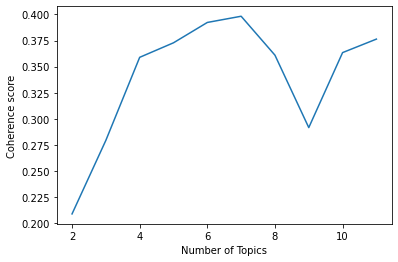

In [ ]:
start,stop,step=2,12,1
clean_documents_list=preprocess_data(sheldon_text)
term_dictionary, doc_term_matrix = prepare_corpus(clean_documents_list)
coherence_values = compute_coherence_values(term_dictionary, doc_term_matrix,clean_documents_list, start, stop, step)
plot_graph(coherence_values,start,stop,step)

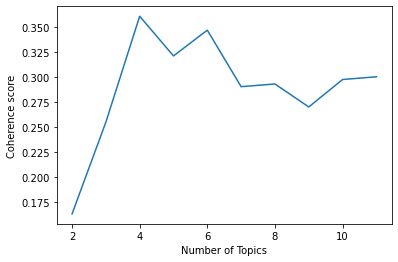

In [ ]:
start,stop,step=2,12,1
clean_documents_list=preprocess_data(leonard_text)
term_dictionary, doc_term_matrix = prepare_corpus(clean_documents_list)
coherence_values = compute_coherence_values(term_dictionary, doc_term_matrix,clean_documents_list, start, stop, step)
plot_graph(coherence_values,start,stop,step)

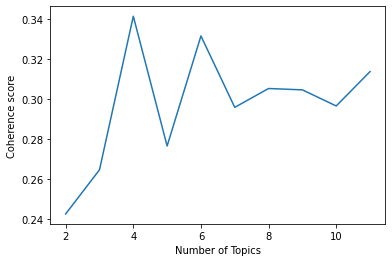

In [ ]:
start,stop,step=2,12,1
clean_documents_list=preprocess_data(penny_text)
term_dictionary, doc_term_matrix = prepare_corpus(clean_documents_list)
coherence_values = compute_coherence_values(term_dictionary, doc_term_matrix,clean_documents_list, start, stop, step)
plot_graph(coherence_values,start,stop,step)

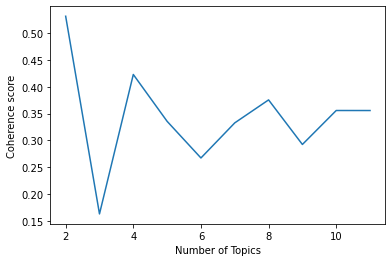

In [ ]:
start,stop,step=2,12,1
clean_documents_list=preprocess_data(howard_text)
term_dictionary, doc_term_matrix = prepare_corpus(clean_documents_list)
coherence_values = compute_coherence_values(term_dictionary, doc_term_matrix,clean_documents_list, start, stop, step)
plot_graph(coherence_values,start,stop,step)

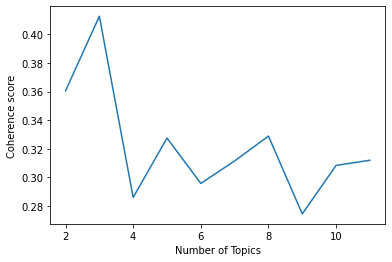

In [ ]:
start,stop,step=2,12,1
clean_documents_list=preprocess_data(raj_text)
term_dictionary, doc_term_matrix = prepare_corpus(clean_documents_list)
coherence_values = compute_coherence_values(term_dictionary, doc_term_matrix,clean_documents_list, start, stop, step)
plot_graph(coherence_values,start,stop,step)

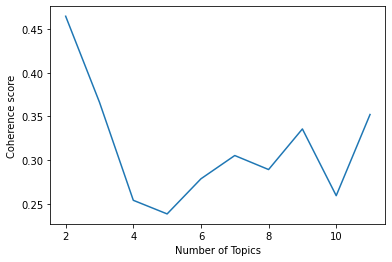

In [ ]:
start,stop,step=2,12,1
clean_documents_list=preprocess_data(amy_text)
term_dictionary, doc_term_matrix = prepare_corpus(clean_documents_list)
coherence_values = compute_coherence_values(term_dictionary, doc_term_matrix,clean_documents_list, start, stop, step)
plot_graph(coherence_values,start,stop,step)

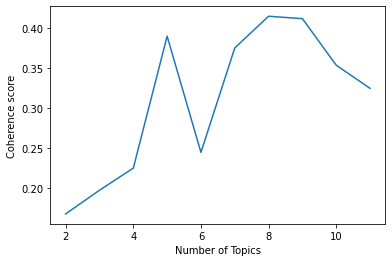

In [ ]:
start,stop,step=2,12,1
clean_documents_list=preprocess_data(bernadette_text)
term_dictionary, doc_term_matrix = prepare_corpus(clean_documents_list)
coherence_values = compute_coherence_values(term_dictionary, doc_term_matrix,clean_documents_list, start, stop, step)
plot_graph(coherence_values,start,stop,step)

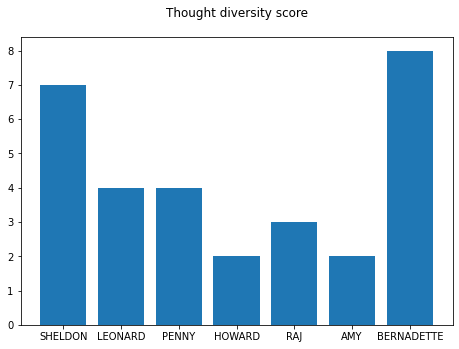

In [ ]:
lchar = ['SHELDON','LEONARD','PENNY','HOWARD','RAJ','AMY','BERNADETTE']
ltopics =[7,4,4,2,3,2,8]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Thought diversity score', pad=20)
ax.bar(lchar,ltopics)
plt.show()

In [ ]:
number_of_topics=8
words=20
model=create_gensim_lsa_model(preprocess_data(sheldon_text),number_of_topics,words)
sheldon_topics = model.print_topics(num_topics=number_of_topics, num_words=words)
sheldon_topics

[(0,
  '0.350*"oh" + 0.318*"go" + 0.306*"know" + 0.294*"well" + 0.250*"get" + 0.219*"like" + 0.212*"one" + 0.201*"say" + 0.171*"leonard" + 0.142*"right" + 0.138*"think" + 0.131*"make" + 0.124*"penni" + 0.123*"would" + 0.118*"good" + 0.114*"time" + 0.113*"see" + 0.099*"want" + 0.095*"let" + 0.088*"ami"'),
 (1,
  '-0.822*"oh" + 0.464*"go" + 0.208*"know" + 0.163*"say" + 0.059*"like" + -0.056*"good" + 0.050*"one" + -0.050*"penni" + 0.045*"would" + -0.039*"ye" + 0.032*"well" + 0.032*"time" + -0.031*"leonard" + -0.029*"dear" + -0.029*"uh" + -0.026*"lord" + 0.023*"sheldon" + 0.023*"think" + 0.021*"right" + 0.021*"back"'),
 (2,
  '0.929*"penni" + 0.284*"leonard" + -0.110*"oh" + -0.098*"well" + -0.092*"get" + -0.080*"one" + -0.079*"know" + -0.044*"say" + -0.022*"see" + 0.020*"ami" + -0.017*"make" + -0.017*"time" + 0.016*"relationship" + -0.014*"right" + -0.014*"like" + 0.013*"angri" + 0.013*"raj" + -0.012*"thing" + 0.012*"bernadett" + 0.012*"good"'),
 (3,
  '-0.741*"go" + 0.423*"well" + 0.306*"

In [ ]:
number_of_topics=8
words=20
model=create_gensim_lsa_model(preprocess_data(leonard_text),number_of_topics,words)
leonard_topics = model.print_topics(num_topics=number_of_topics, num_words=words)
leonard_topics

[(0,
  '-0.478*"go" + -0.371*"get" + -0.335*"know" + -0.209*"oh" + -0.194*"sheldon" + -0.184*"want" + -0.178*"like" + -0.171*"well" + -0.166*"okay" + -0.136*"think" + -0.133*"yeah" + -0.131*"uh" + -0.125*"say" + -0.115*"penni" + -0.108*"right" + -0.103*"come" + -0.102*"let" + -0.099*"one" + -0.094*"good" + -0.089*"make"'),
 (1,
  '-0.804*"go" + 0.485*"get" + 0.173*"know" + 0.123*"oh" + 0.120*"like" + 0.112*"uh" + 0.089*"yeah" + 0.055*"well" + 0.055*"good" + 0.051*"think" + 0.049*"one" + 0.041*"look" + -0.037*"let" + 0.036*"time" + 0.034*"want" + 0.031*"thing" + 0.030*"say" + 0.029*"would" + 0.027*"make" + 0.027*"could"'),
 (2,
  '0.736*"get" + -0.515*"know" + 0.218*"go" + -0.157*"oh" + -0.145*"well" + -0.112*"like" + -0.110*"uh" + -0.106*"yeah" + -0.085*"think" + -0.071*"good" + -0.065*"say" + -0.054*"penni" + -0.054*"want" + -0.049*"make" + -0.048*"would" + -0.046*"realli" + -0.040*"time" + -0.040*"thing" + 0.039*"back" + -0.038*"talk"'),
 (3,
  '-0.670*"oh" + 0.504*"know" + -0.364*"y

In [ ]:
number_of_topics=8
words=20
model=create_gensim_lsa_model(preprocess_data(penny_text),number_of_topics,words)
penny_topics = model.print_topics(num_topics=number_of_topics, num_words=words)
penny_topics

[(0,
  '-0.396*"know" + -0.350*"okay" + -0.345*"oh" + -0.322*"get" + -0.312*"go" + -0.202*"well" + -0.184*"yeah" + -0.152*"want" + -0.150*"like" + -0.137*"leonard" + -0.126*"right" + -0.124*"sheldon" + -0.123*"look" + -0.114*"come" + -0.111*"say" + -0.098*"think" + -0.095*"realli" + -0.093*"guy" + -0.093*"let" + -0.089*"gonna"'),
 (1,
  '0.902*"oh" + -0.245*"okay" + -0.214*"know" + -0.141*"get" + -0.122*"go" + 0.104*"god" + -0.086*"well" + -0.063*"want" + 0.043*"hey" + -0.033*"look" + -0.033*"like" + 0.031*"come" + -0.030*"say" + 0.030*"sorri" + -0.028*"one" + -0.028*"gonna" + -0.027*"let" + 0.027*"thank" + -0.026*"think" + -0.025*"talk"'),
 (2,
  '-0.718*"okay" + 0.652*"know" + -0.122*"get" + 0.076*"yeah" + 0.074*"well" + 0.072*"want" + -0.056*"go" + -0.052*"oh" + 0.043*"say" + -0.042*"let" + 0.037*"like" + 0.037*"mean" + 0.033*"realli" + 0.025*"would" + 0.025*"hey" + 0.024*"sheldon" + -0.024*"see" + 0.023*"kind" + -0.022*"look" + 0.019*"talk"'),
 (3,
  '0.597*"go" + 0.446*"yeah" + -0

In [ ]:
number_of_topics=8
words=20
model=create_gensim_lsa_model(preprocess_data(howard_text),number_of_topics,words)
howard_topics = model.print_topics(num_topics=number_of_topics, num_words=words)
howard_topics

[(0,
  '-0.475*"get" + -0.424*"go" + -0.260*"know" + -0.224*"like" + -0.198*"oh" + -0.181*"well" + -0.169*"say" + -0.161*"want" + -0.153*"okay" + -0.130*"one" + -0.128*"make" + -0.125*"yeah" + -0.121*"look" + -0.116*"think" + -0.114*"right" + -0.110*"gonna" + -0.108*"come" + -0.092*"guy" + -0.087*"take" + -0.085*"let"'),
 (1,
  '-0.712*"get" + 0.668*"go" + 0.087*"say" + 0.062*"want" + 0.056*"like" + 0.048*"right" + 0.045*"well" + 0.041*"let" + 0.037*"space" + -0.033*"oh" + -0.033*"good" + -0.031*"hey" + 0.026*"okay" + 0.025*"make" + -0.025*"take" + -0.023*"littl" + -0.022*"work" + 0.022*"guy" + -0.020*"sheldon" + -0.019*"time"'),
 (2,
  '-0.539*"go" + -0.447*"get" + 0.430*"know" + 0.341*"like" + 0.212*"oh" + 0.184*"well" + 0.123*"say" + 0.118*"yeah" + 0.103*"look" + 0.083*"think" + 0.078*"make" + 0.075*"come" + 0.064*"one" + 0.057*"want" + 0.054*"would" + 0.048*"okay" + 0.047*"guy" + 0.045*"talk" + -0.044*"back" + 0.041*"great"'),
 (3,
  '-0.792*"oh" + 0.512*"know" + -0.176*"yeah" + -0

In [ ]:
number_of_topics=8
words=20
model=create_gensim_lsa_model(preprocess_data(raj_text),number_of_topics,words)
raj_topics = model.print_topics(num_topics=number_of_topics, num_words=words)
raj_topics

[(0,
  '-0.351*"get" + -0.346*"like" + -0.304*"oh" + -0.288*"go" + -0.282*"know" + -0.203*"okay" + -0.191*"say" + -0.184*"uh" + -0.168*"well" + -0.153*"want" + -0.150*"look" + -0.131*"one" + -0.130*"think" + -0.120*"guy" + -0.117*"make" + -0.115*"yeah" + -0.113*"come" + -0.105*"see" + -0.103*"right" + -0.101*"good"'),
 (1,
  '-0.988*"oontz" + -0.055*"yeah" + -0.049*"right" + -0.048*"one" + -0.044*"let" + -0.042*"nice" + -0.040*"set" + -0.040*"sexi" + -0.040*"shot" + -0.040*"mood" + -0.040*"glamour" + 0.028*"like" + 0.025*"go" + 0.023*"get" + 0.022*"oh" + 0.021*"know" + 0.016*"say" + 0.013*"okay" + 0.012*"look" + 0.012*"uh"'),
 (2,
  '0.725*"like" + -0.416*"get" + -0.324*"oh" + -0.313*"go" + 0.172*"know" + 0.107*"look" + 0.064*"think" + 0.063*"would" + -0.058*"okay" + -0.058*"come" + 0.056*"sound" + 0.052*"make" + 0.046*"realli" + 0.042*"well" + 0.040*"say" + -0.039*"let" + -0.032*"uh" + 0.031*"feel" + -0.031*"hey" + -0.028*"back"'),
 (3,
  '0.791*"oh" + -0.411*"go" + -0.282*"get" + -0.

In [ ]:
number_of_topics=8
words=20
model=create_gensim_lsa_model(preprocess_data(amy_text),number_of_topics,words)
amy_topics = model.print_topics(num_topics=number_of_topics, num_words=words)
amy_topics

[(0,
  '0.463*"sheldon" + 0.342*"know" + 0.328*"get" + 0.293*"go" + 0.259*"well" + 0.241*"like" + 0.161*"think" + 0.146*"say" + 0.143*"want" + 0.125*"oh" + 0.123*"make" + 0.113*"one" + 0.105*"good" + 0.090*"let" + 0.089*"would" + 0.089*"look" + 0.088*"feel" + 0.085*"time" + 0.082*"take" + 0.079*"gonna"'),
 (1,
  '-0.821*"sheldon" + 0.324*"well" + 0.274*"get" + 0.198*"like" + 0.182*"know" + 0.088*"say" + 0.085*"one" + 0.064*"feel" + 0.053*"oh" + -0.048*"go" + 0.045*"see" + 0.044*"right" + 0.042*"time" + 0.041*"want" + 0.040*"let" + 0.040*"mean" + 0.039*"make" + 0.039*"good" + 0.037*"penni" + 0.032*"okay"'),
 (2,
  '-0.682*"get" + 0.627*"go" + -0.168*"sheldon" + 0.143*"well" + 0.100*"make" + 0.099*"think" + 0.090*"like" + 0.076*"say" + 0.072*"one" + 0.068*"want" + -0.067*"know" + 0.059*"oh" + 0.046*"see" + -0.043*"let" + 0.032*"would" + -0.032*"note" + 0.030*"call" + 0.030*"parti" + 0.029*"tell" + 0.029*"take"'),
 (3,
  '-0.611*"know" + 0.493*"go" + 0.483*"get" + -0.295*"like" + 0.076*"g

In [ ]:
number_of_topics=8
words=20
model=create_gensim_lsa_model(preprocess_data(bernadette_text),number_of_topics,words)
bernadette_topics = model.print_topics(num_topics=number_of_topics, num_words=words)
bernadette_topics

[(0,
  '-0.820*"go" + -0.290*"get" + -0.170*"know" + -0.134*"like" + -0.120*"think" + -0.115*"want" + -0.105*"oh" + -0.096*"well" + -0.093*"say" + -0.085*"one" + -0.081*"right" + -0.076*"take" + -0.076*"back" + -0.074*"gonna" + -0.069*"howard" + -0.067*"work" + -0.062*"okay" + -0.062*"time" + -0.060*"let" + -0.059*"make"'),
 (1,
  '0.549*"go" + -0.517*"get" + -0.270*"know" + -0.242*"like" + -0.189*"think" + -0.172*"oh" + -0.154*"want" + -0.141*"well" + -0.121*"one" + -0.092*"make" + -0.087*"gonna" + -0.081*"okay" + -0.080*"howard" + -0.079*"look" + -0.073*"littl" + -0.071*"say" + -0.071*"come" + -0.067*"howi" + -0.066*"guy" + -0.061*"sure"'),
 (2,
  '-0.727*"get" + 0.385*"know" + 0.329*"oh" + 0.308*"like" + 0.093*"look" + 0.093*"think" + 0.079*"want" + 0.078*"well" + 0.071*"okay" + 0.067*"make" + 0.062*"yeah" + 0.062*"howi" + 0.057*"god" + 0.057*"right" + -0.056*"marri" + 0.055*"mayb" + 0.050*"would" + 0.050*"mean" + 0.047*"good" + 0.046*"say"'),
 (3,
  '0.785*"know" + -0.409*"like" + 

In [ ]:
s= bernadette_topics[0][1]
s.split('"')[1::2]

['go',
 'get',
 'know',
 'like',
 'think',
 'want',
 'oh',
 'well',
 'say',
 'one',
 'right',
 'take',
 'back',
 'gonna',
 'howard',
 'work',
 'okay',
 'time',
 'let',
 'make']

In [ ]:
lchar2 = [ 'sheldon', 'leonard','penny','howard',  'raj','amy', 'bernadette']
topics_list = [sheldon_topics, leonard_topics, penny_topics, howard_topics, raj_topics, amy_topics, bernadette_topics]
character_affinity =[]
for i in range(len(lchar2)):
    tp = topics_list[i]
    ca = [0 for i in range(7)]
    for j in range(len(lchar2)):
        for k, t in enumerate(tp):
            s = t[1].split('"')[1::2]
            if(lchar2[j] in s):
                ca[j] = ca[j]+1
    character_affinity.append(ca)

ca_df = pd.DataFrame(character_affinity)
ca_df.columns =lchar2
ca_df.index = lchar2
ca_df
                

,sheldon,leonard,penny,howard,raj,amy,bernadette
sheldon,1,6,0,0,1,0,0
leonard,6,0,0,0,0,0,0
penny,5,3,0,0,0,0,0
howard,2,0,0,0,0,0,0
raj,1,0,0,2,0,0,0
amy,6,0,0,0,0,0,0
bernadette,0,0,0,4,0,0,0


Text(0.5, 1.0, 'Character affinity heat map')

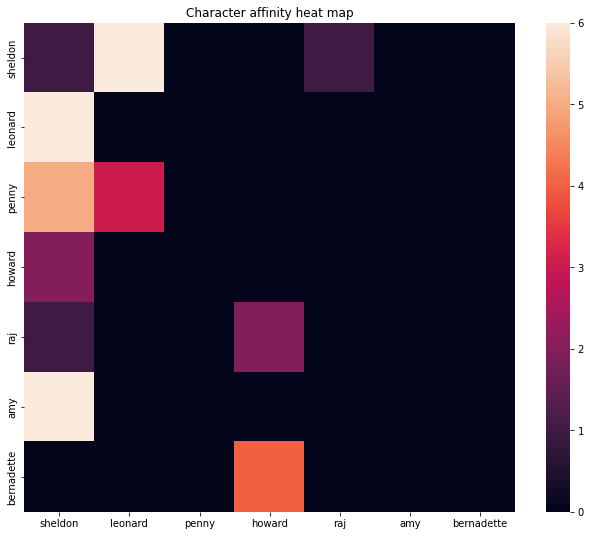

In [ ]:
import seaborn as sb
#plotting character affinity heatmap 
#Higher affinity towards one character means higher mentions of another character in the other character's key topics through out
fig, ax = plt.subplots(figsize=(11, 9))
sb.heatmap(ca_df)

# displaying the title 
plt.title("Character affinity heat map")

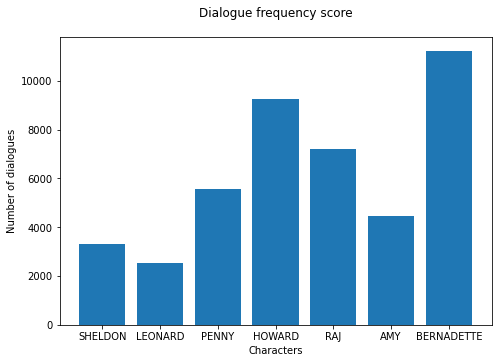

In [ ]:
# Most important character by dialogues - Joey
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Dialogue frequency score", pad=20)
plt.xlabel('Characters')  
plt.ylabel('Number of dialogues') 
ax.bar(['SHELDON','LEONARD','PENNY','HOWARD','RAJ','AMY','BERNADETTE'], friends_char_df.groupby(by=["speaker"]).count()['dialogue'])

plt.show()

In [ ]:
# using TextBlob.sentiment method 
from textblob import TextBlob 
all_char = ['SHELDON','LEONARD','PENNY','HOWARD','RAJ','AMY','BERNADETTE']
for i in friends_char_df.index:
    dialogue = friends_char_df.loc[i,'dialogue']
    tb = TextBlob(dialogue)
    s=0
    if(tb.sentiment[0]>0):
        s =1
    elif(tb.sentiment[0]<0):
        s=-1
    friends_char_df.loc[i,'Sentiment'] =s
friends_char_df

,season,episode,episode_name,speaker,dialogue,Sentiment
0,1,1,Pilot Episode,SHELDON,photon direct plane two slit either slit observe go slits it’s unobserved however it’s observe it’s leave plane hit target go slit,1.0
1,1,1,Pilot Episode,LEONARD,agree what’s point,0.0
2,1,1,Pilot Episode,SHELDON,there’s point think it’s good idea tee-shirt,1.0
3,1,1,Pilot Episode,LEONARD,excuse,-1.0
4,1,1,Pilot Episode,LEONARD,one across aegean eight nabakov twenty-six across mcm fourteen is… move finger… phylum make fourteen across port-au-prince see papa doc’s capital idea that’s port-au-prince haiti,0.0
...,...,...,...,...,...,...
45012,10,24,The Long Distance Dissonance,SHELDON,uh breakfast yes lunch cough drop really rid line suck eat,1.0
45013,10,24,The Long Distance Dissonance,SHELDON,thoughtful thank,1.0
45014,10,24,The Long Distance Dissonance,SHELDON,question seek romantic relationship,0.0
45015,10,24,The Long Distance Dissonance,SHELDON,well would raise number problem we’re colleague i’m currently relation… excuse moment,-1.0


In [ ]:
actor_sentiment =[]
for actor in all_char:
    cp = friends_char_df[friends_char_df.speaker == actor][friends_char_df.Sentiment == 1].Sentiment.count()
    cn = friends_char_df[friends_char_df.speaker == actor][friends_char_df.Sentiment == 0].Sentiment.count()
    c = friends_char_df[friends_char_df.speaker == actor][friends_char_df.Sentiment == -1].Sentiment.count()
    s = cp+cn+c
    actor_sentiment.append([cp*100/s,c*100/s,cn*100/s])
actor_sentiment

[[35.180080035571365, 16.629613161405068, 48.19030680302357],
 [32.06751054852321, 13.231634750622092, 54.7008547008547],
 [37.51041956098916, 13.045290358432897, 49.444290080577936],
 [34.088050314465406, 14.303683737646002, 51.60826594788859],
 [36.04469273743017, 13.94413407821229, 50.01117318435754],
 [35.44877606527652, 14.324569356300998, 50.22665457842248],
 [34.14442700156986, 14.050235478806908, 51.80533751962324]]

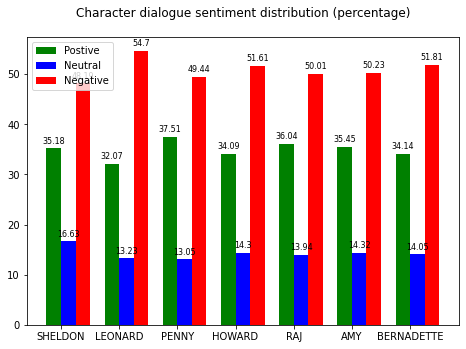

In [ ]:
data_sent =  np.array(actor_sentiment).T.tolist()
X = np.arange(7)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
r1 =ax.bar(X + 0.00, data_sent[0], color = 'g', width= 0.25)
r2 =ax.bar(X + 0.25, data_sent[1], color = 'b', width = 0.25)
r3 =ax.bar(X + 0.50, data_sent[2], color = 'r', width = 0.25)
ax.legend(labels=['Postive', 'Neutral','Negative'])
ax.set_title("Character dialogue sentiment distribution (percentage)", pad=20)
plt.xticks(X + .25 /2, all_char)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = round(rect.get_height(),2)
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)


autolabel(r1)
autolabel(r2)
autolabel(r3)

plt.show()